# Number Classifier

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
digit_mnist = keras.datasets.mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

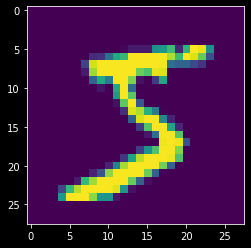

In [6]:
plt.imshow(X_train_full[0])

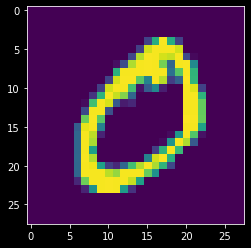

In [7]:
plt.imshow(X_train_full[1])

In [8]:
y_train_full[1]

0

In [9]:
y_train_full[0]

5

In [10]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
X_train_full = X_train_full/255.
X_test = X_test/255.

In [12]:
x_valid, X_train = X_train_full[:6000], X_train_full[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]

In [13]:
x_valid.shape

(6000, 28, 28)

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


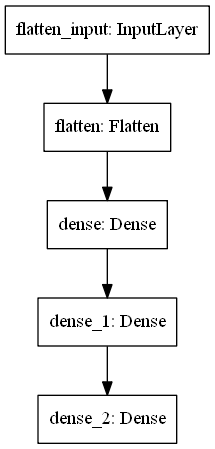

In [17]:
import pydot
keras.utils.plot_model(model)

In [18]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.02570029, -0.00921319, -0.02297589, ...,  0.03759523,
         0.01990343, -0.00419658],
       [ 0.0493257 ,  0.07532704,  0.04591972, ...,  0.01272719,
         0.07017377,  0.06893378],
       [-0.00902112,  0.0490617 ,  0.01508749, ...,  0.00632862,
        -0.02900814, -0.04371899],
       ...,
       [ 0.06044598,  0.02830634,  0.04788385, ..., -0.02156743,
        -0.06206664, -0.06688078],
       [ 0.03822813,  0.07278952,  0.02177001, ..., -0.04696669,
        -0.04292265,  0.0316055 ],
       [-0.01534326, -0.03178874, -0.04308994, ...,  0.00643031,
         0.02572545, -0.03443564]], dtype=float32)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
weights.shape, biases.shape

((784, 200), (200,))

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [22]:
model_create = model.fit(X_train, y_train, epochs=60,
                        validation_data=(x_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 4s 3ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9283
Epoch 3/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9292 - val_loss: 0.2254 - val_accuracy: 0.9383
Epoch 4/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.1961 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1893 - accuracy: 0.9461 - val_loss: 0.1790 - val_accuracy: 0.9483
Epoch 6/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.1638 - val_accuracy: 0.9522
Epoch 7/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1521 - accuracy: 0.9569 - val_loss: 0.1482 - val_accuracy:

In [23]:
model_create.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [24]:
model_create.history

{'loss': [0.6606810092926025,
  0.30064910650253296,
  0.24880096316337585,
  0.21511711180210114,
  0.18928387761116028,
  0.16897206008434296,
  0.15211254358291626,
  0.13781490921974182,
  0.1260201632976532,
  0.1157253235578537,
  0.10663460195064545,
  0.09911271184682846,
  0.09174101799726486,
  0.08569958806037903,
  0.08015569299459457,
  0.07516244053840637,
  0.07067800313234329,
  0.06592419743537903,
  0.0624399296939373,
  0.058745719492435455,
  0.05553574860095978,
  0.05248778313398361,
  0.04959080368280411,
  0.04681885987520218,
  0.04428007826209068,
  0.04202835261821747,
  0.03982100263237953,
  0.03779098764061928,
  0.03577915579080582,
  0.03384553641080856,
  0.03216800093650818,
  0.030371930450201035,
  0.028932776302099228,
  0.027381546795368195,
  0.025990838184952736,
  0.02463597059249878,
  0.023668816313147545,
  0.02228458598256111,
  0.021180303767323494,
  0.020184975117444992,
  0.019117841497063637,
  0.018255814909934998,
  0.0173794385045766

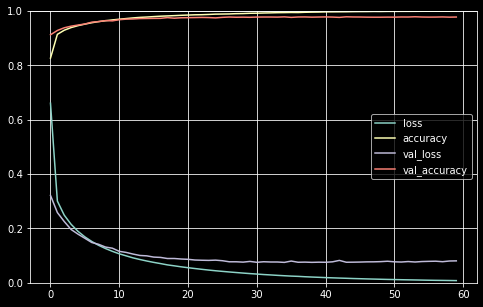

In [25]:
pd.DataFrame(model_create.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0741 - accuracy: 0.9795


[0.07405887544155121, 0.9794999957084656]

In [27]:
x_new = X_test[:5]

In [28]:
model.predict(x_new).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
y_pred = model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, 0, 4], dtype=int64)

In [31]:
np.argmax(model.predict(x_new), axis=-1)

array([7, 2, 1, 0, 4], dtype=int64)

In [32]:
np.array(classes)[y_pred]

array([7, 2, 1, 0, 4])

7


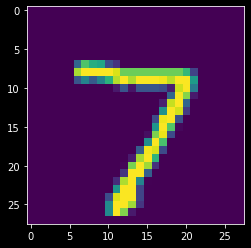

In [33]:
plt.imshow(x_new[0])
print(y_pred[0])

2


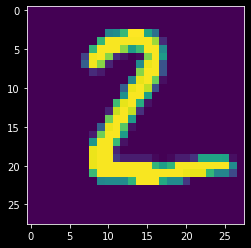

In [34]:
plt.imshow(x_new[1])
print(y_pred[1])

0


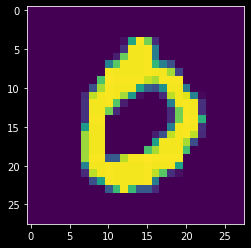

In [35]:
plt.imshow(x_new[3])
print(y_pred[3])

4


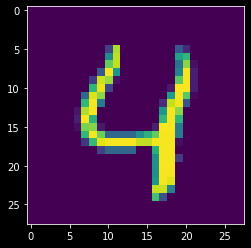

In [36]:
plt.imshow(x_new[4])
print(y_pred[4])